In [17]:
import os
from tqdm import tqdm
from collections import Counter
from scipy.spatial import distance as dst

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn import linear_model
from sklearn import svm
from  sklearn.linear_model  import Ridge
from  sklearn.linear_model  import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.cross_validation import LeaveOneLabelOut
from sklearn.cross_validation import LeavePLabelOut

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.cross_validation import StratifiedKFold

In [ ]:
rd = pd.read_csv("rd-MG-SP-2018-2016.csv")

In [ ]:
sp = pd.read_csv("sp-MG-SP-2018-2016.csv", nrows=100)

In [2]:
randomrd = pd.read_csv('rd-MG-SP-2018-2016.csv',skiprows=lambda idx: np.random.random() > .005 if idx != 0 else False)

C:\Users\tati\Anaconda3\envs\tera-fev2018\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
rd.isnull().sum()

In [ ]:
rd.columns

In [138]:
randomrd.T.head(100)

,0,1,2,3,4,5,6,7,8,9,...,39819,39820,39821,39822,39823,39824,39825,39826,39827,39828
UF_ZI,310000,310000,310000,310000,310000,310000,310000,310000,310000,310000,...,355400,355430,355430,355450,355540,355540,355620,355670,355670,355700
ANO_CMPT,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,...,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
MES_CMPT,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,2,2,2,2
CEP,35628000,36510000,36830000,39930000,37810000,36555000,36500000,36512000,36500000,37044140,...,18275040,19280000,19280000,18530000,11680000,11680000,13272460,13285754,13285426,18110510
MUNIC_RES,314350,315630,312420,313470,312830,312400,316990,316900,316990,317070,...,355400,355430,355430,355450,355540,355540,355620,355670,355670,355700
NASC,19891216,19300610,19330624,19761026,19311125,19521217,19630208,19620610,19511016,19451004,...,20121104,19980529,19810110,19750225,19860303,19400403,19930516,19920320,19900505,19740410
SEXO,3,1,1,3,1,3,1,3,3,1,...,1,3,3,3,3,1,3,1,3,1
UTI_MES_TO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
UTI_INT_TO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DIAR_ACOM,0,1,11,0,2,6,0,0,1,4,...,4,0,0,0,0,4,1,0,2,0


In [3]:
rdc = randomrd.drop(['UF_ZI','ANO_CMPT','MES_CMPT','CEP','NASC','DT_INTER','DT_SAIDA','MUNIC_MOV',
                     'COD_IDADE','NACIONAL','NUM_FILHOS','RACA_COR','ETNIA','CONTRACEP1','CONTRACEP2','CNES',
                     'INFEHOSP', 'DIAGSEC1','DIAGSEC2','DIAGSEC3','DIAGSEC4','DIAGSEC5', 'DIAGSEC6', 
                     'DIAGSEC7', 'DIAGSEC8', 'DIAGSEC9','TPDISEC7','TPDISEC8','TPDISEC9'], axis=1)

In [6]:
rdc.head()

,MUNIC_RES,SEXO,UTI_MES_TO,UTI_INT_TO,DIAR_ACOM,QT_DIARIAS,PROC_SOLIC,PROC_REA,VAL_SH,VAL_SP,...,CAR_INT,INSTRU,GESTRISCO,CNAER,TPDISEC1,TPDISEC2,TPDISEC3,TPDISEC4,TPDISEC5,TPDISEC6
0,310510,3,0,0,0,6,303090138,303090138,98.36,59.37,...,1,0,1,0,1,0,0,0,0,0
1,310060,1,0,0,0,4,408050454,408050454,154.24,114.17,...,2,0,1,0,1,0,0,0,0,0
2,310170,3,0,0,5,5,303080078,303080078,403.74,40.96,...,2,0,1,0,0,0,0,0,0,0
3,310840,3,0,0,4,4,411010034,411010034,427.68,276.43,...,2,0,1,0,0,0,0,0,0,0
4,310170,1,0,0,0,2,308020030,308020030,182.65,26.62,...,2,0,1,0,0,0,0,0,0,0


In [7]:
rdc.dtypes

MUNIC_RES       int64
SEXO            int64
UTI_MES_TO      int64
UTI_INT_TO      int64
DIAR_ACOM       int64
QT_DIARIAS      int64
PROC_SOLIC      int64
PROC_REA        int64
VAL_SH        float64
VAL_SP        float64
VAL_TOT       float64
VAL_UTI       float64
DIAG_PRINC     object
IND_VDRL        int64
IDADE           int64
DIAS_PERM       int64
MORTE           int64
CAR_INT         int64
INSTRU          int64
GESTRISCO       int64
CNAER           int64
TPDISEC1        int64
TPDISEC2        int64
TPDISEC3        int64
TPDISEC4        int64
TPDISEC5        int64
TPDISEC6        int64
dtype: object

In [8]:
rdc["DIAG_PRINC"].value_counts().describe()

count    3171.000000
mean       12.637338
std        54.640693
min         1.000000
25%         1.000000
50%         3.000000
75%         8.000000
max      2061.000000
Name: DIAG_PRINC, dtype: float64

In [4]:
rdc["DIAG_PRINC"] = rdc["DIAG_PRINC"].apply(lambda row: row[0])
rdc["DIAG_PRINC"].unique()

array(['J', 'I', 'E', 'O', 'A', 'F', 'S', 'N', 'C', 'T', 'K', 'R', 'M',
       'D', 'B', 'L', 'Z', 'G', 'P', 'Q', 'H'], dtype=object)

In [5]:
cat = rdc.select_dtypes(include=['object']).axes[1] 

rdn = pd.get_dummies(rdc,columns=cat,drop_first=True)

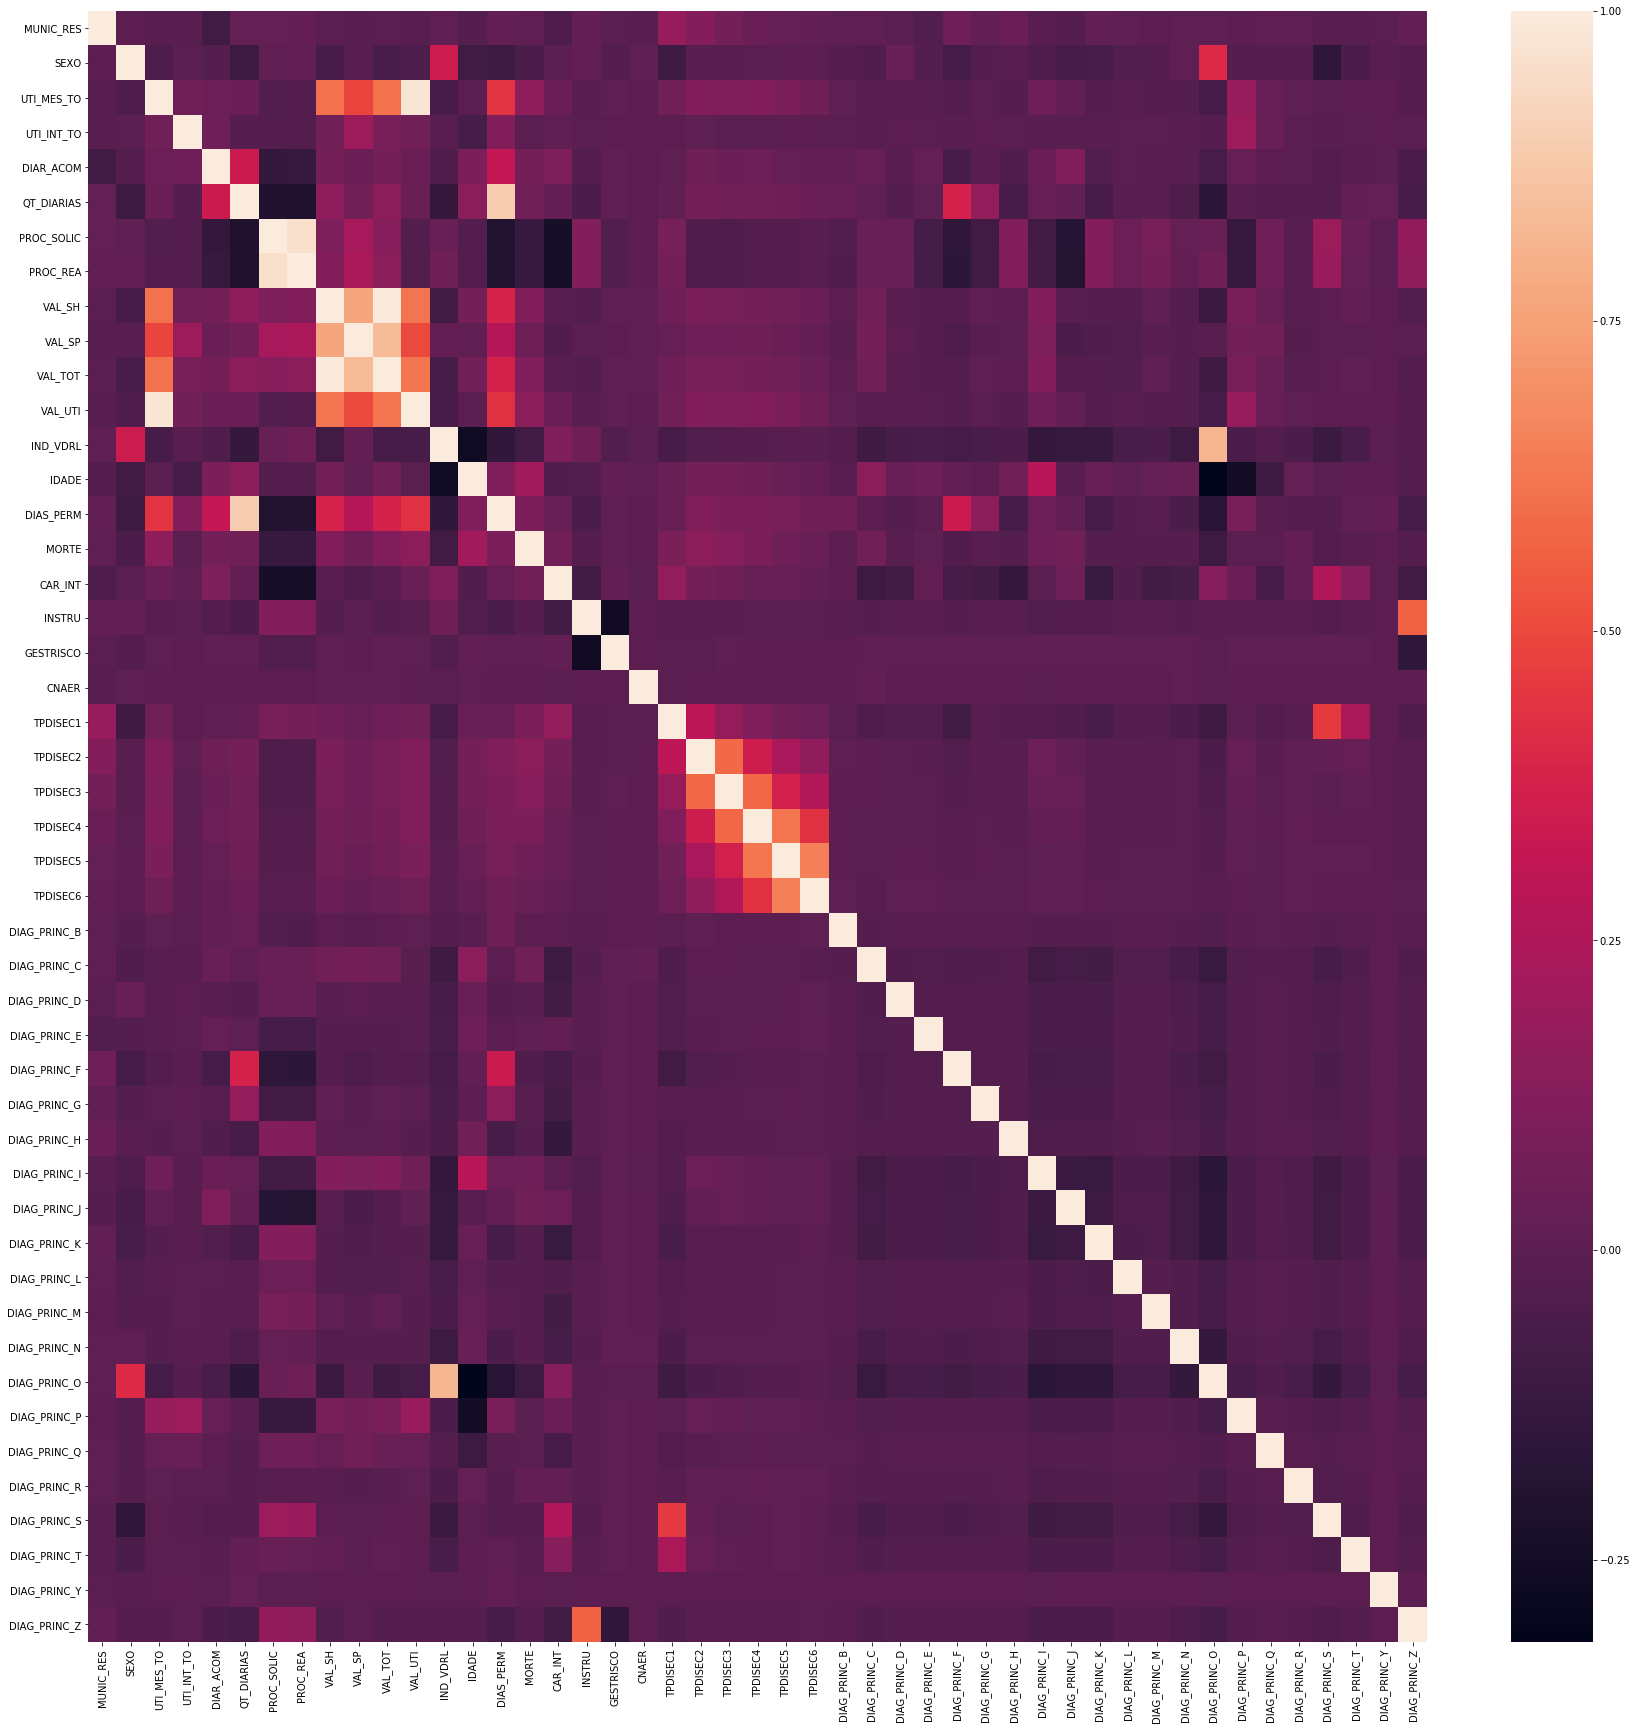

In [159]:
plt.figure(figsize=(30,30))
corr = rdn.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [6]:
data = rdn.drop('QT_DIARIAS',  axis=1)
target = rdn["QT_DIARIAS"]

In [7]:
dtrain, dtest, ttrain, ttest =  train_test_split(data, target, test_size = 0.3,  random_state=144)

In [8]:
lr =  linear_model.LinearRegression()
lr.fit(dtrain, ttrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
tpred =  lr.predict(dtest)

In [10]:
lr.score(dtest,ttest)

0.95719709418370591

In [11]:
ptrain = lr.predict(dtrain)
ptest = lr.predict(dtest)

lr.coef_

array([  5.11927114e-07,  -6.58697360e-03,  -9.45218751e-01,
        -9.73552254e-01,   3.34927232e-02,  -2.35030502e-10,
        -8.17269141e-10,   1.46136890e-05,  -2.59191213e-05,
         1.05187799e-05,  -2.41515233e-05,  -9.40799446e-02,
        -2.63359276e-04,   9.56749102e-01,   8.78936897e-01,
         5.47367802e-02,   7.84468084e-03,   1.48801199e-01,
         4.22554341e-04,  -3.93304235e-02,   8.85779352e-02,
         1.45359352e-02,   9.52788657e-02,   1.68255955e-02,
        -2.09951360e-01,  -2.82511289e+00,   4.31053502e-02,
        -1.24400251e-01,  -6.64420182e-02,  -2.23822464e-01,
         3.89511530e-01,   2.25701220e-01,   2.98683152e-02,
        -2.28766429e-01,  -2.92951343e-03,   1.48296510e-01,
         1.01141888e-01,   2.71697114e-03,  -5.46625713e-02,
        -1.45088876e-01,   9.81776872e-02,   5.49422358e-02,
         1.10013881e-01,   1.31163097e-01,   1.88716789e-01])



 ---Train---


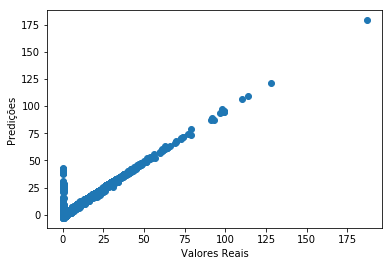



 ---Test---


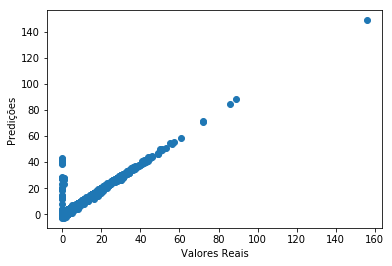

In [12]:
#plotando o modelo ajustado
print ("\n\n ---Train---")
plt.scatter(ttrain, ptrain) # real x previsto train
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()
print ("\n\n ---Test---")
plt.scatter(ttest, ptest) # real x previsto test
plt.xlabel("Valores Reais")
plt.ylabel("Predições")
plt.show()

In [13]:
print ("R^2 train:", lr.score( dtrain, ttrain))
print ("R^2 test:", lr.score( dtest, ttest))

R^2 train: 0.95761771722
R^2 test: 0.957197094184


In [15]:
cv_results =  cross_val_score(lr, data, target, cv=4)
np.mean(cv_results)

0.95792703221800457

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(dtrain, ttrain) 

In [ ]:
neigh.score(X_test,y_test)